## 1. Perkenalan

====================================================

Nama : Panji Putra Rianto  

Program ini dibuat untuk membuat model yang bisa melakukan pengelompokan terhadap customer credit card menggunakan unsupervised learning. Akan dilakukan analisa terlebih dahulu sebelum pembuatan model dan akan digunakan metode clustering dengan menggunakan K-Mean untuk pembuatan model.


====================================================

## 2. Query SQL

Dibawah ini merupakan query yang dijalankan untuk mengambil data dari BigQuery.

``` SQL
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_012_hck.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0;
```

## 3. Import Libraries

In [2]:
# Melakukan import libraries
import pandas as pd
import numpy as np
import pickle
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
import warnings
warnings.filterwarnings('ignore')

## 4. Data Loading

In [3]:
# Meload data dari csv ke dataframe
df = pd.read_csv("P1G6_Set_1_panji_putra.csv")
pd.set_option('display.max_columns', None)
print(df.info())

# Menampilkan data 10 pertama dan terakhir
display(df.head(10))
display(df.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535           0.125000      200.0               0.0   
1     1902   943.584041           0.875000      103.0             103.0   
2     2322     1.979916           0.125000       80.0              80.0   
3     3426   461.455720           1.000000      585.0             585.0   
4     3976  1053.594730           1.000000     1450.0            1450.0   
5     4266  2237.238086           1.000000      120.0             120.0   
6     4360  2730.843802           1.000000     2900.0            2900.0   
7     4680   424.994385           0.375000     1200.0            1200.0   
8     5884    18.885677           0.375000       57.0              57.0   
9       24     0.004816           0.545455       51.7               0.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   
5                     0.0           0.0                0.125   
6                     0.0           0.0                0.125   
7                     0.0           0.0                0.125   
8                     0.0           0.0                0.125   
9                    51.7           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   
5                       0.125                             0.000   
6                       0.125                             0.000   
7                       0.125                             0.000   
8                       0.125                             0.000   
9                       0.000                             0.250   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   
5                     0.0                 0              1        2500.0   
6                     0.0                 0              1        2900.0   
7                     0.0                 0              1        1200.0   
8                     0.0                 0              1        1500.0   
9                     0.0                 0              3        3000.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8  
5  343.102984        712.986387               0.0       8  
6    0.000000               NaN               0.0       8  
7   57.266292         56.720210               0.0       8  
8    0.000000               NaN               0.0       8  
9   33.249088          0.059481               0.0      12

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     1588   538.768762           0.909091     226.95            129.58   
4466     6900  7468.012010           1.000000    1569.41            796.07   
4467     2528   427.642111           0.888889       0.00              0.00   
4468     1226   706.327578           0.888889     169.54            169.54   
4469     2152  1420.727073           1.000000       0.00              0.00   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                   97.37    452.009130             0.545455   
4466                  773.34   4500.288676             0.545455   
4467                    0.00   2563.705644             0.000000   
4468                    0.00   1406.735573             0.333333   
4469                    0.00    311.804499             0.000000   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.090909                          0.454545   
4466                    0.454545                          0.363636   
4467                    0.000000                          0.000000   
4468                    0.333333                          0.000000   
4469                    0.000000                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 8              9        1200.0   
4466                0.272727                 7             10        8700.0   
4467                0.888889                62              0        1200.0   
4468                0.888889                14              3        2500.0   
4469                0.900000                 9              0        1500.0   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465   946.649324        211.220001          0.000000      11  
4466  2162.943350       4628.802111          0.000000      11  
4467  2853.967334        146.976542          0.500000       9  
4468   302.976780        142.597254          0.000000       9  
4469   506.765033        449.179818          0.000000      10  
4470  1379.635287        271.364415          0.090909      11  
4471  4372.148648        241.645387          0.090909      11  
4472  1039.000037        886.050237          0.000000      11  
4473   905.844846       2376.919568          0.090909      11  
4474  3056.424974        910.707525          0.090909      11

Dapat dilihat bahwa dataset yang kita miliki merupakan data credit card yang memiliki 18 kolom dengan 4475 rows. Untuk datanya sendiri terdapat 14 kolom bertipe float64 dan 4 kolom integer64.

In [4]:
# Melihat nama-nama kolom
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Melakukan pencarian duplicate
df.duplicated().sum()

0

Tidak terdapat duplicate pada data.

## 5. Exploratory Data Analysis (EDA)

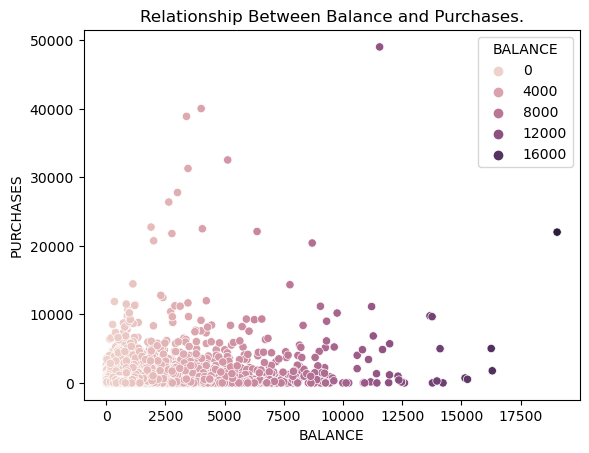

In [6]:
# Membuat scatter plot untuk membandingkan antara kolom 'BALANCE' dan 'PURCHASES'
sns.scatterplot(data=df, x="BALANCE", y="PURCHASES", hue='BALANCE')
plt.title('Relationship Between Balance and Purchases.')
plt.show()

Dari hasil visualisasi diatas dapat terlihat bahwa terdapat pola linear yang jelas antara BALANCE dan PURCHASES. Semakin tinggi BALANCE, semakin sedikit PURCHASES yang dilakukan. Berarti, orang yang memiliki saldo lebih tinggi cenderung melakukan pembelian lebih sedikit. Sebaliknya, semakin rendah BALANCE, semakin banyak PURCHASES yang dilakukan. Dapat diambil kesimpulan juga bahwa orang yang memiliki saldo lebih rendah cenderung melakukan pembelian lebih banyak.

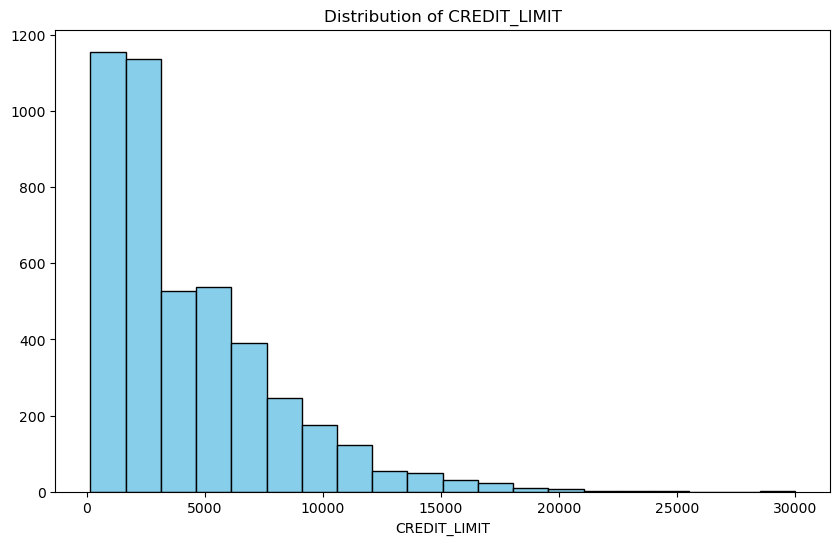

In [7]:
# Membuat histogram untuk CREDIT_LIMIT
plt.figure(figsize=(10, 6))
plt.hist(df['CREDIT_LIMIT'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('CREDIT_LIMIT')
plt.title(f'Distribution of CREDIT_LIMIT')
          
plt.show()


Dari hasil visualisasi diatas dapat diambil kesimpulan bahwa distribusi Credit Limit tidak merata atau right-skewed karena terdapat tail pada sisi kanan distribusi data, bisa dipastikan juga terdapat outlier pada Credit Limit. Diketahui juga bahwa mayoritas orang memiliki Credit Limit yang rendah, dengan konsentrasi tertinggi di rentang 0-5000.

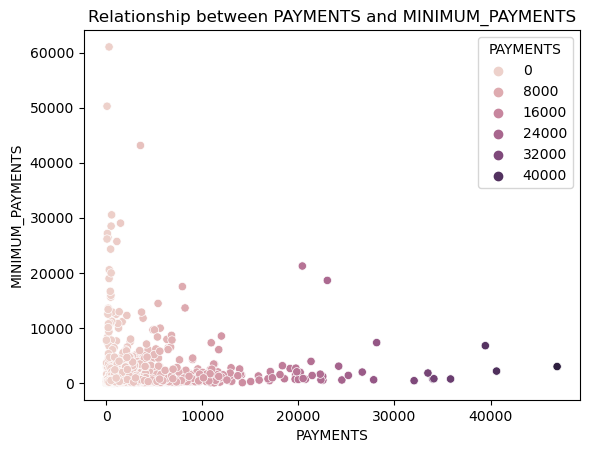

In [8]:
# Membuat scatter plot untuk membandingkan antara kolom 'PAYMENTS' dan 'MINIMUM_PAYMENTS'
sns.scatterplot(data=df, x='PAYMENTS', y='MINIMUM_PAYMENTS', hue='PAYMENTS')
plt.title('Relationship between PAYMENTS and MINIMUM_PAYMENTS')
plt.show()

Dari visualisasi diatas, kita bisa mengambil kesimpulan bahwa distribusinya agak tersebar, terutama dengan penyebaran titik di sepanjang sumbu y. Ini menunjukkan bahwa MINIMUM_PAYMENTS tidak selalu berbanding lurus dengan PAYMENTS yang dilakukan. Dapat terlihat juga terdapat outlier karena beberapa titik berada jauh dari kumpulan data utama, menunjukkan adanya beberapa pembayaran minimum yang jauh lebih tinggi dibandingkan dengan yang lainnya.

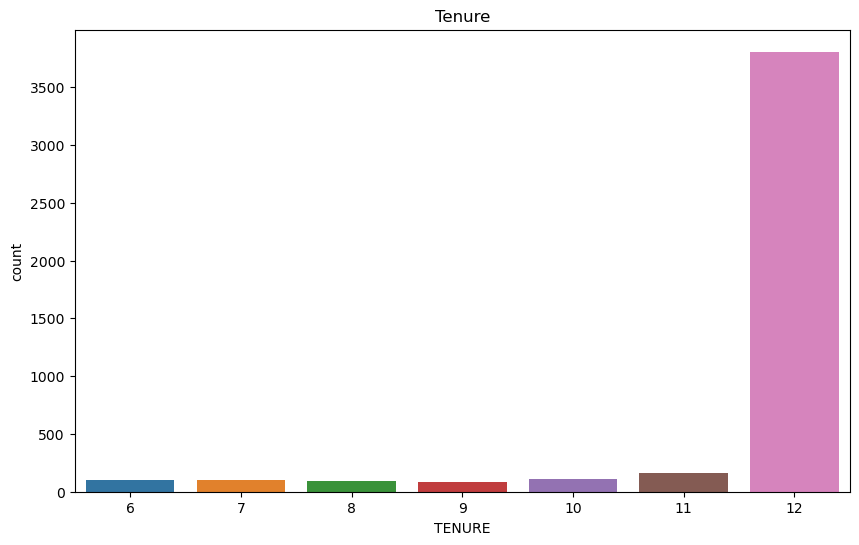

In [9]:
# Membuat histogram untuk Tenure
plt.figure(figsize=(10, 6))
sns.countplot(x='TENURE', data=df)
plt.title('Tenure')

plt.show()

Hasil visualisasi diatas dapat diambil kesimpulan bahwa distribusi datanya sangat tinggi pada Tenure 12 yang memiliki jumlah 3500, lebih tinggi dibandingkan tenure yang lainnya. Hal ini dapat mengindikasikan bahwa terdapat banyak customer yang memiliki Tenure 12.

## 6. Feature Engineering

### Handling Missing Values

In [10]:
# Melakukan pencarian null value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Setelah dilakukan pengecekan null terlihat bahwa terdapat null pada data dan akan kita lakukan drop.

In [11]:
# Melakukan drop null pada data
df.dropna(inplace=True)
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Setelah dilakukan drop null, sudah tidak terdapat null pada data

### Cek Cardinality

In [12]:
# Mencari nilai unique pada kolom
col_uniq = ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

for column in col_uniq:
    unique_values_count = df[column].nunique()
    print(f"Jumlah unique value pada {column}: {unique_values_count}")

Jumlah unique value pada CUST_ID: 4316
Jumlah unique value pada BALANCE: 4313
Jumlah unique value pada BALANCE_FREQUENCY: 38
Jumlah unique value pada PURCHASES: 3118
Jumlah unique value pada ONEOFF_PURCHASES: 2022
Jumlah unique value pada INSTALLMENTS_PURCHASES: 2292
Jumlah unique value pada CASH_ADVANCE: 2091
Jumlah unique value pada PURCHASES_FREQUENCY: 47
Jumlah unique value pada ONEOFF_PURCHASES_FREQUENCY: 44
Jumlah unique value pada PURCHASES_INSTALLMENTS_FREQUENCY: 47
Jumlah unique value pada CASH_ADVANCE_FREQUENCY: 46
Jumlah unique value pada CASH_ADVANCE_TRX: 55
Jumlah unique value pada PURCHASES_TRX: 147
Jumlah unique value pada CREDIT_LIMIT: 151
Jumlah unique value pada PAYMENTS: 4316
Jumlah unique value pada MINIMUM_PAYMENTS: 4316
Jumlah unique value pada PRC_FULL_PAYMENT: 47
Jumlah unique value pada TENURE: 7


Dari hasil cardinality cek diatas dapat diketahui bahwa kolom-kolom seperti CUST_ID, BALANCE, PAYMENTS, dan MINIMUM_PAYMENTS merupakan kolom yang memiliki unique values paling banyak diantara kolom lain, hal ini mungkin disebabkan karena kolom tersebut bukan merupakan kolom categorical dibanding kolom-kolom lain yang memiliki unique values lebih sedikit.

### Handling Outlier

In [13]:
# Melakukan pengecekan distribusi data
distribution_check = df.agg(['count', 'mean', 'median', 'skew', 'kurt', 'std', 'min', 'max'])
distribution_check

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count   4316.000000   4316.000000        4316.000000   4316.000000   
mean    4474.638554   1600.114511           0.895236   1025.274057   
median  4475.000000    916.693628           1.000000    379.300000   
skew      -0.000256      2.440901          -2.083168      8.902272   
kurt      -1.201785      8.033083           3.385233    127.377663   
std     2589.259871   2107.347942           0.206730   2241.729131   
min        2.000000      0.000000           0.000000      0.000000   
max     8950.000000  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        4316.000000             4316.000000   4316.000000   
mean          600.770438              424.888909    986.980658   
median         35.955000               95.845000      0.000000   
skew           10.045515                8.030305      4.713175   
kurt          160.774065              118.690229     34.414118   
std          1690.105736              940.627467   2159.134558   
min             0.000000                0.000000      0.000000   
max         40761.250000            22500.000000  29282.109150   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           4316.000000                 4316.000000   
mean               0.495675                    0.205447   
median             0.500000                    0.083333   
skew               0.035642                    1.494505   
kurt              -1.626835                    1.039463   
std                0.399564                    0.299252   
min                0.000000                    0.000000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        4316.000000             4316.000000   
mean                            0.369805                0.136236   
median                          0.181818                0.000000   
skew                            0.486577                1.788835   
kurt                           -1.417722                3.039660   
std                             0.398217                0.200511   
min                             0.000000                0.000000   
max                             1.000000                1.166667   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        4316.000000    4316.000000   4316.000000   4316.000000   
mean            3.252549      14.801900   4524.431479   1785.801612   
median          0.000000       7.000000   3000.000000    874.442322   
skew            4.722877       4.429897      1.525379      5.987445   
kurt           38.779410      31.357542      2.811046     53.455248   
std             6.576772      24.473182   3688.856008   2997.093142   
min             0.000000       0.000000    150.000000      4.841543   
max           110.000000     358.000000  30000.000000  46930.598240   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count        4316.000000       4316.000000  4316.000000  
mean          854.624165          0.162997    11.531511  
median        309.983200          0.000000    12.000000  
skew           12.356758          1.854400    -2.996978  
kurt          222.893929          2.067809     8.020082  
std          2306.642962          0.299700     1.324580  
min             0.037744          0.000000     6.000000  
max         61031.618600          1.000000    12.000000

Setelah dilakukan pengecekan distribusi data dengan menggunakan count, mean, median, skew, dsb. Dapat terlihat bahwa mayoritas data memiliki nilai skew dan kurtosis yang besar. Dari sini bisa kita simpulkan bahwa data tidak terdistribusi dengan normal dan terdapat banyak outlier pada data.

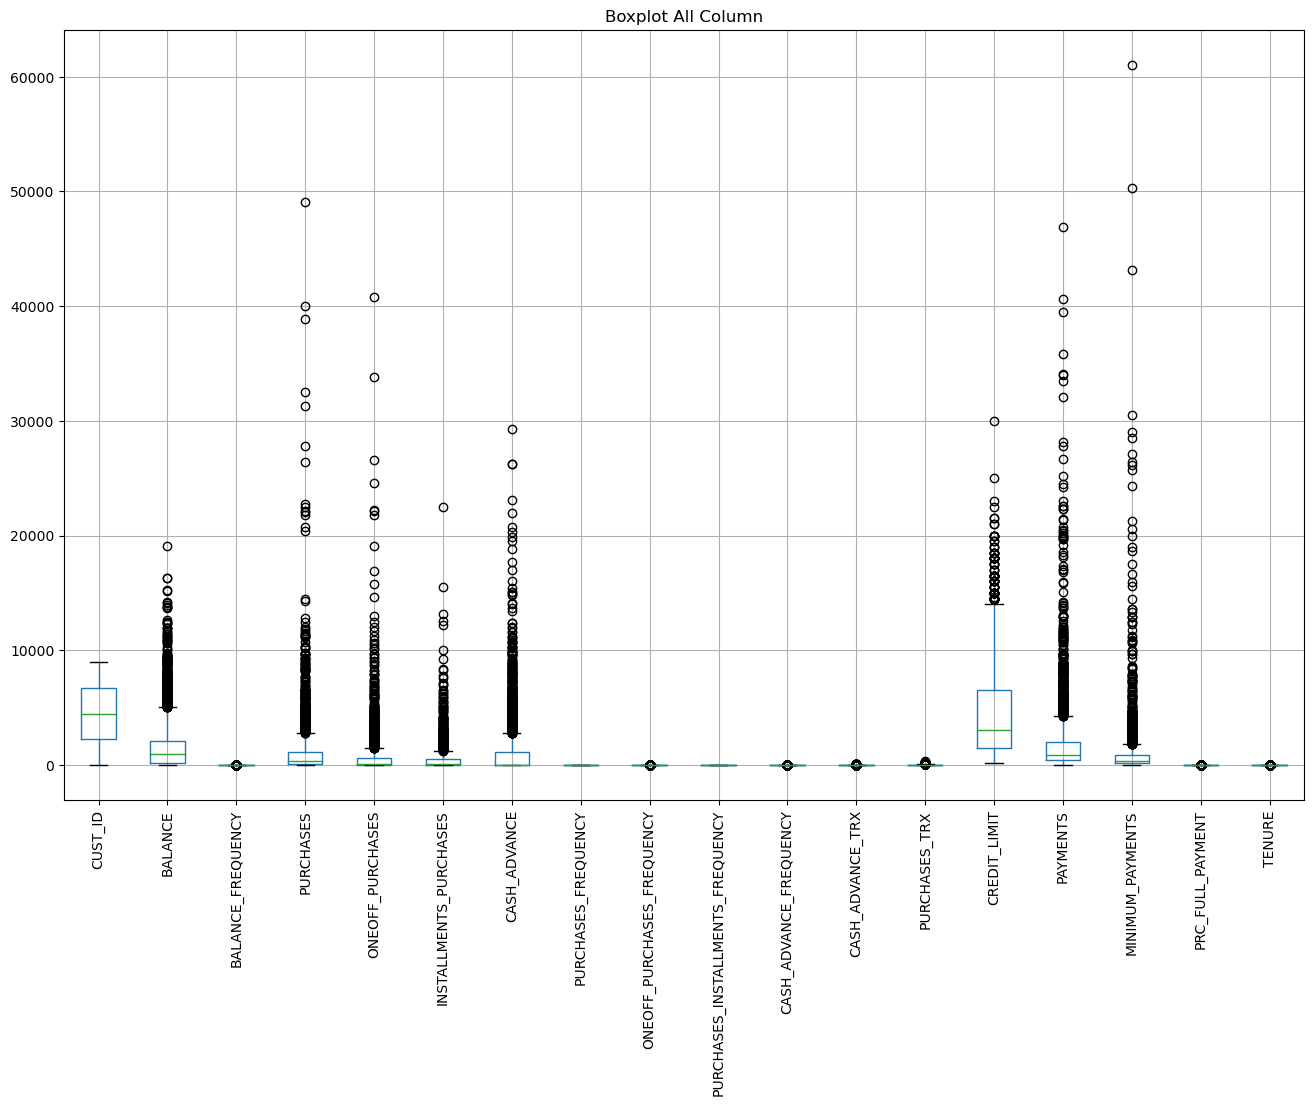

In [14]:
# Membuat boxplot untuk melihat outlier
plt.figure(figsize=(16,10))
df.boxplot(rot=90)
plt.title('Boxplot All Column')
plt.show()

Hasil visualisasi diatas memperlihatkan bahwa terdapat banyak sekali outlier pada data yang kita miliki, hanya kolom CUST_ID, PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY yang terlihat tidak terdapat outlier. Untuk itu akan dilakukan handling outlier menggunakan winsorizer terhadap kolom yang memiliki outlier. Kecuali untuk kolom TENURE tidak dilakukan handling outlier dikarenakan kolom tersebut memiliki low variance.

In [15]:
# melakukan capping menggunakan winsorizer
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                                                                        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 
                                                                        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                                                        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'])
winsorizer.fit(df)
df2 = winsorizer.transform(df)

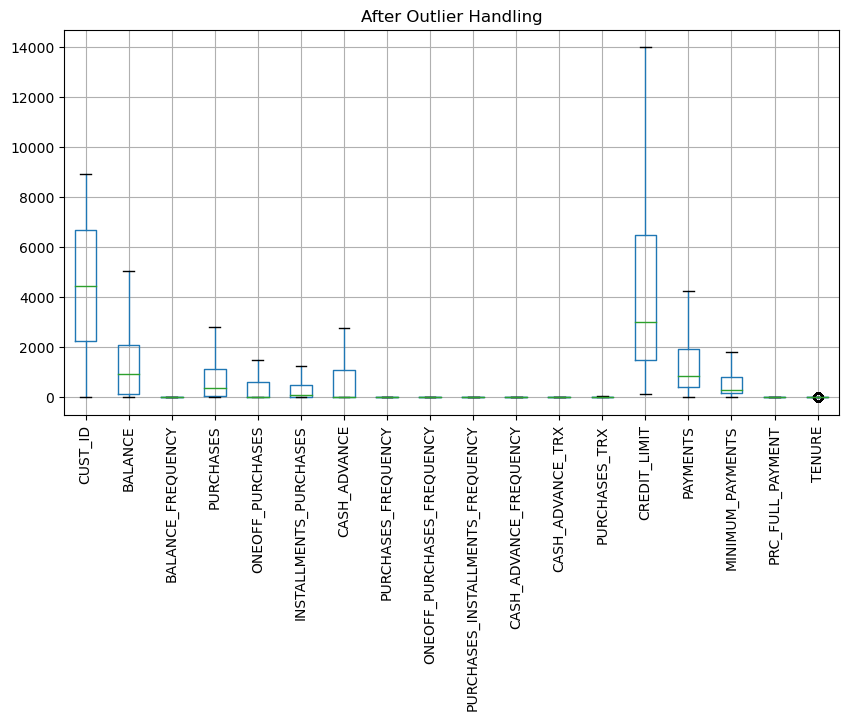

In [16]:
# Membuat boxplot
plt.figure(figsize=(10,5))
df2.boxplot(rot=90)
plt.title('After Outlier Handling')
plt.show()

Setelah dilakukan handling outlier menggunakan winsorizer sudah tidak terdapat outlier pada data.

### Feature Selection

In [17]:
# Menghapus kolom yang tidak diinginkan
df3 = df2.drop(['CUST_ID', 'TENURE'], axis=1)
df3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
1      215.325023        410.484825          0.000000  
3      258.032630        151.696433          0.000000  
4      397.090516        227.143184          0.000000  
5      343.102984        712.986387          0.000000  
7       57.266292         56.720210          0.000000  
...           ...               ...               ...  
4470  1379.635287        271.364415          0.090909  
4471  4245.361617        241.645387          0.090909  
4472  1039.000037        886.050237          0.000000  
4473   905.844846       18

Kolom CUST_ID dan TENURE didrop karena merupakan kolom kategorikal.

### Scaling

In [18]:
# Melakukan scaling menggunakan Standard Scaler
scaler = StandardScaler()
scaler.fit(df3)
df3_scaled = scaler.transform(df3)
df3_scaled = pd.DataFrame(df3_scaled,columns=df3.columns)

df3_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.310674          -0.769413  -0.731066         -0.499159   
1    -0.621300           0.607400  -0.195703          0.413265   
2    -0.239797           0.607400   0.765062          2.050707   
3     0.522802           0.607400  -0.712184         -0.466978   
4    -0.644791          -1.895893   0.487384          1.577458   
...        ...                ...        ...               ...   
4311 -0.223423           0.607400  -0.845469         -0.694138   
4312 -0.397009          -0.393917  -0.845469         -0.694138   
4313  1.263243           0.607400  -0.222383          0.114588   
4314  2.200062           0.607400   0.927148          2.145357   
4315  0.355140           0.607400   0.300829         -0.264617   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.746660     -0.669386            -0.927807   
1                  -0.746660     -0.669386            -0.927807   
2                  -0.746660     -0.669386            -0.927807   
3                  -0.746660     -0.669386            -0.927807   
4                  -0.746660     -0.669386            -0.927807   
...                      ...           ...                  ...   
4311               -0.746660      0.602659            -1.240685   
4312               -0.746660      2.133721            -1.240685   
4313               -0.426633      1.358653             1.262334   
4314               -0.746660      2.133721            -0.102950   
4315                1.179674      2.133721             1.034787   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.256309                         -0.928760   
1                      -0.256309                         -0.928760   
2                      -0.256309                         -0.928760   
3                      -0.256309                         -0.928760   
4                      -0.256309                         -0.928760   
...                          ...                               ...   
4311                   -0.713052                         -0.928760   
4312                   -0.713052                         -0.928760   
4313                    1.944361                         -0.015494   
4314                    0.947829                         -0.928760   
4315                   -0.380876                          1.126092   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.717508         -0.701130      -0.827553     -1.006388   
1                  -0.717508         -0.701130      -0.827553     -1.006388   
2                  -0.717508         -0.701130      -0.827553     -0.860379   
3                  -0.717508         -0.701130      -0.827553     -0.568362   
4                  -0.717508         -0.701130      -0.827553     -0.947984   
...                      ...               ...            ...           ...   
4311                2.284853          1.919605      -0.904364     -0.947984   
4312                2.284853          1.337220      -0.904364     -0.086533   
4313                2.284853          1.919605       0.631859      1.650972   
4314                2.284853          2.210798       1.015915      0.453700   
4315                2.284853          2.210798       0.401425     -0.130335   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0    -0.918190         -0.292201         -0.637685  
1    -0.884745         -0.757683         -0.637685  
2    -0.775845         -0.621977         -0.637685  
3    -0.818124          0.251909         -0.637685  
4    -1.041970         -0.928517         -0.637685  
...        ...               ...               ...  
4311 -0.006388         -0.542436         -0.069482  
4312  2.237838         -0.595892         -0.069482  
4313 -0.273148          0.563199         -0.637685  
4314 -0.377426          2.246375         -0.069482  
4315  1.306751          0.607550    

Dikarenakan sudah dilakukan handling outlier, maka akan dilakukan scaling menggunakan standard scaler. Dapat dilihat bahwa valuenya sudah berubah karena data sudah discaling 

### PCA

In [19]:
# Dimensionality Reduction menggunakan PCA
pca = PCA()
pca.fit(df3_scaled)

PCA()

Text(0, 0.5, 'Eigenvalues')

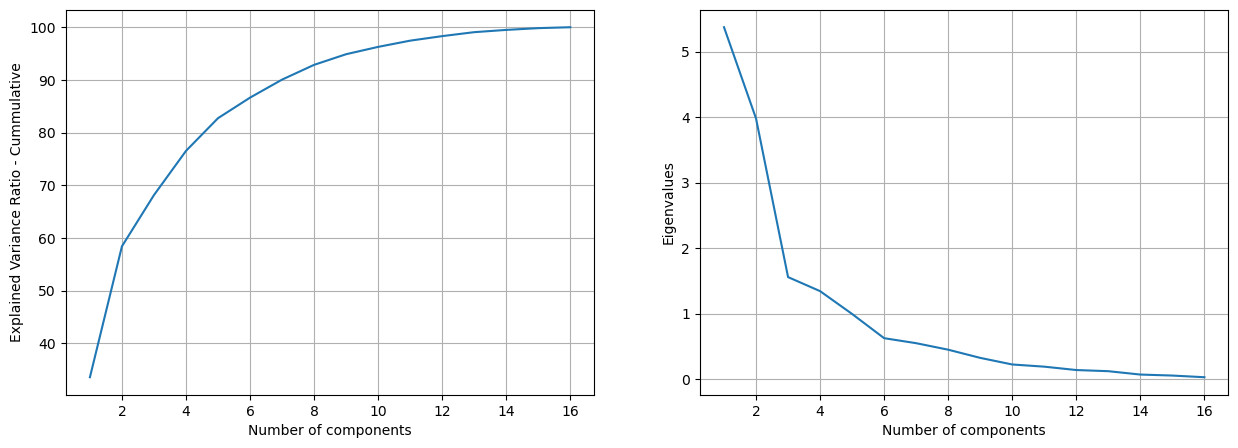

In [20]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

Dari hasil visualisasi diatas, dapat dilihat pada gambar sebelah kiri yaitu Explained Variance Ratio. Kurva mulai datar disekitar 6-8 kolom, menunjukkan bahwa sebagian besar varians lebih dari 90% dalam data dapat ditangkap dengan sekitar 7 kolom. Sedangkan, pada gambar disebelah kanan yaitu Eigenvalues ada penurunan yang curam setelah kolom 1 dan penurunan yang lebih bertahap setelah kolom 2. Eigenvalues menjadi dekat dengan 0 setelah kolom 6, yang menunjukkan bahwa data dapat secara efektif direpresentasikan dalam ruang berdimensi lebih rendah dengan 6 atau 7 kolom saja.

In [21]:
# Melakukan cek terhadap kolom jika kita ingin mengambil 95% informasi
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1
num_features

10

Dari hasil diatas kita dapat mengambil kesimpulan bahwa, kita bisa mengambil hanya 10 kolom untuk tetap mendapatkan informasi 95% pada data.

In [22]:
# Train model dengan 95% informasi data
pca = PCA(n_components=0.95)
pca.fit(df3_scaled)

df_scaled_pca = pca.transform(df3_scaled)

## 7. Model Definition

### Mencari Cluster Yang Paling Optimal

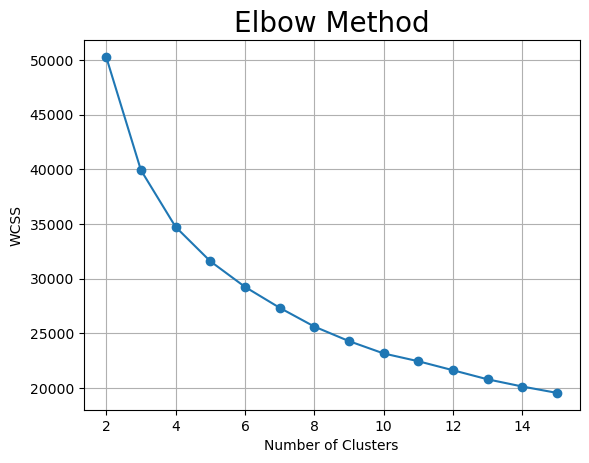

In [23]:
# Mencari jumlah cluster yang optimal menggunakan Elbow Method
wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Dari plot diatas, terlihat bahwa elbow terletak di kisaran cluster 3 hingga 6. Sebelum titik ini, WCSS menurun dengan cepat, menunjukkan peningkatan signifikan dengan setiap tambahan cluster. Setelah titik ini, laju penurunan WCSS tidak terlalu curam.

### Silhouette Plot & Score

In [24]:
# Function untuk membuat Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.23598729430525214
For n_clusters = 3 The average silhouette_score is : 0.23919338890887243
For n_clusters = 4 The average silhouette_score is : 0.2182892077253267
For n_clusters = 5 The average silhouette_score is : 0.21428670893859456
For n_clusters = 6 The average silhouette_score is : 0.21757741508142808
For n_clusters = 7 The average silhouette_score is : 0.21964961567094396
For n_clusters = 8 The average silhouette_score is : 0.21440372082547834
For n_clusters = 9 The average silhouette_score is : 0.21108931463248842
For n_clusters = 10 The average silhouette_score is : 0.21248146808005022
For n_clusters = 11 The average silhouette_score is : 0.2004472769468393
For n_clusters = 12 The average silhouette_score is : 0.2034906840642992
For n_clusters = 13 The average silhouette_score is : 0.21211550274231408
For n_clusters = 14 The average silhouette_score is : 0.2092107726804816


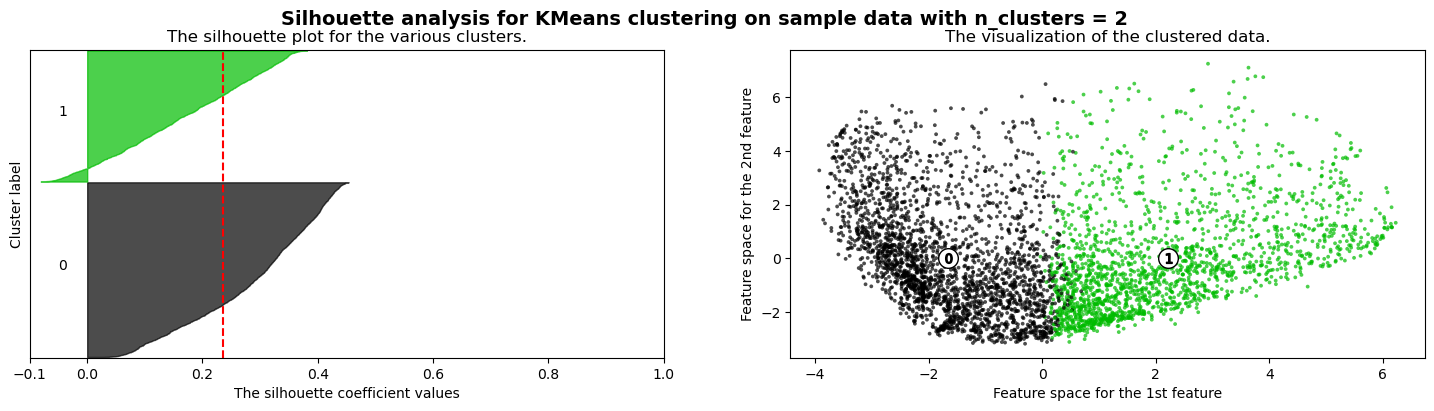

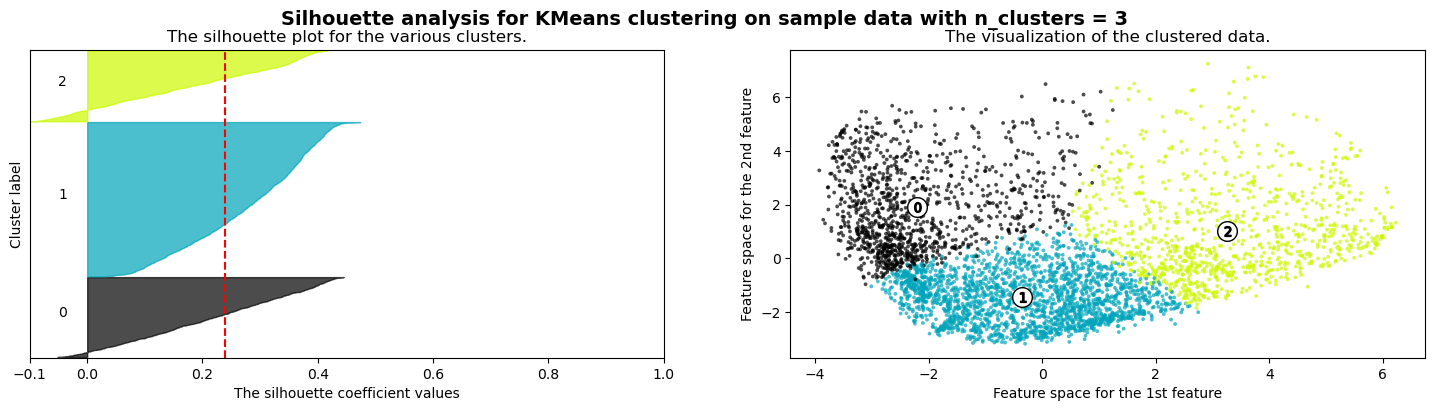

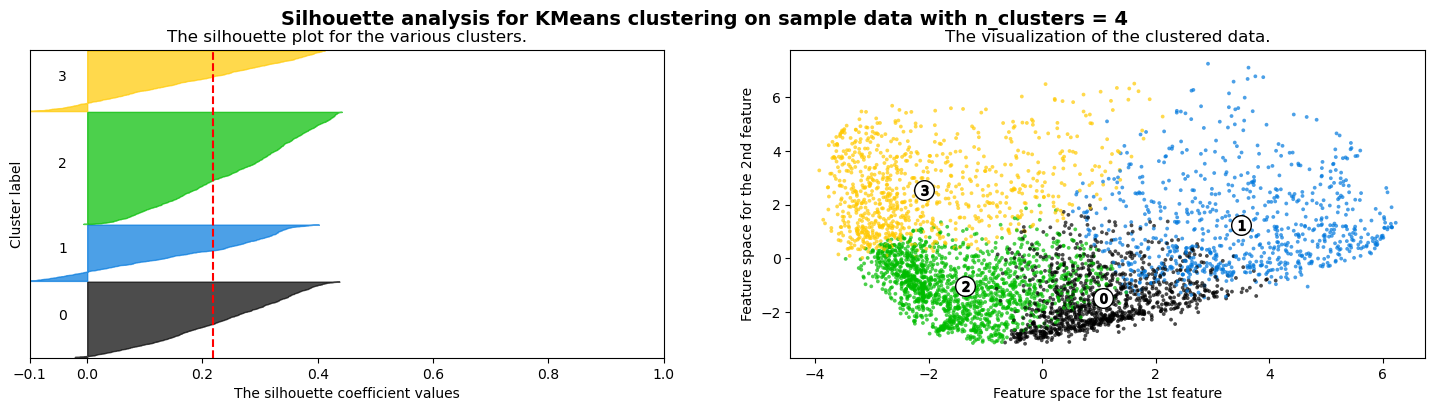

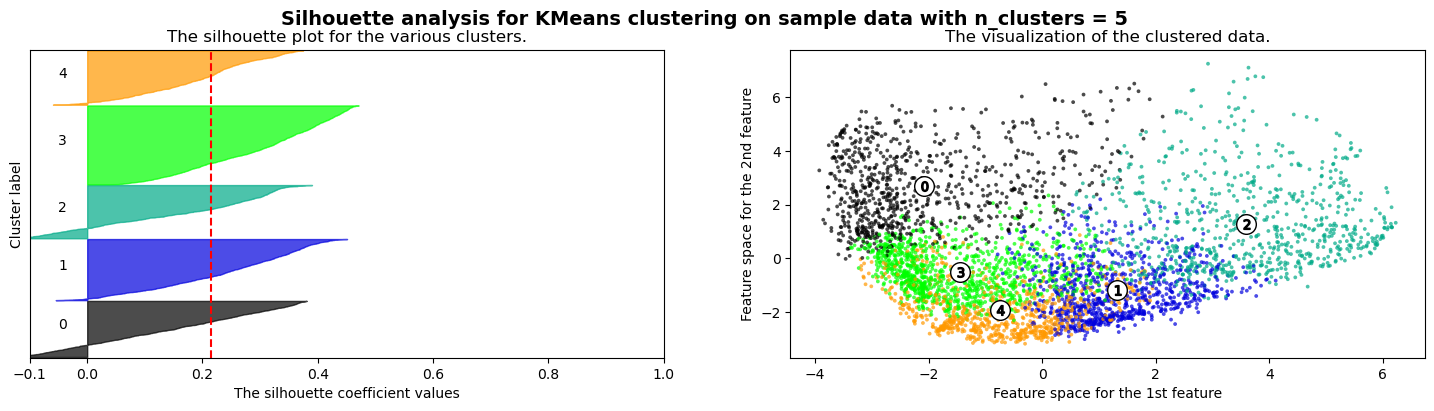

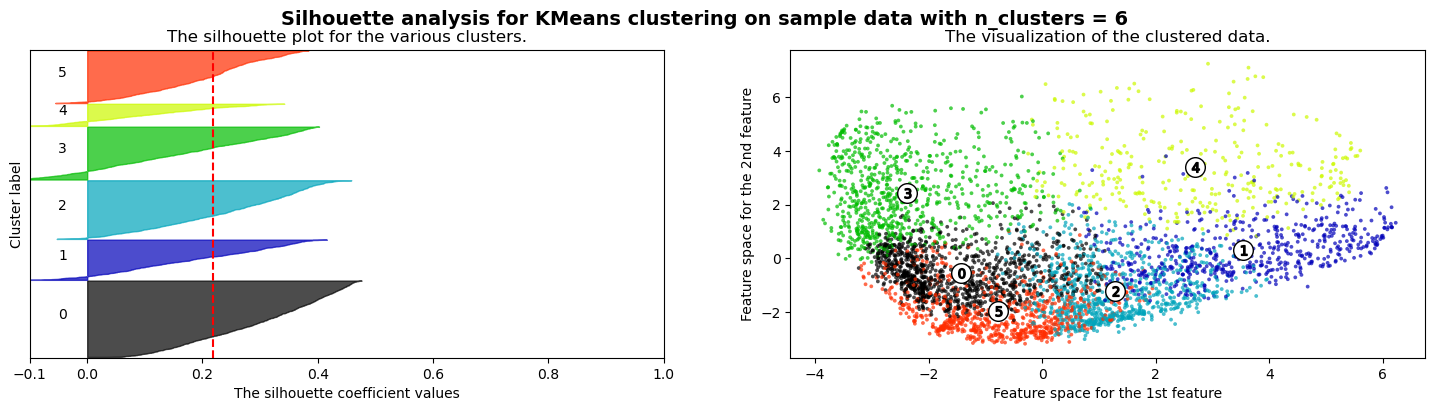

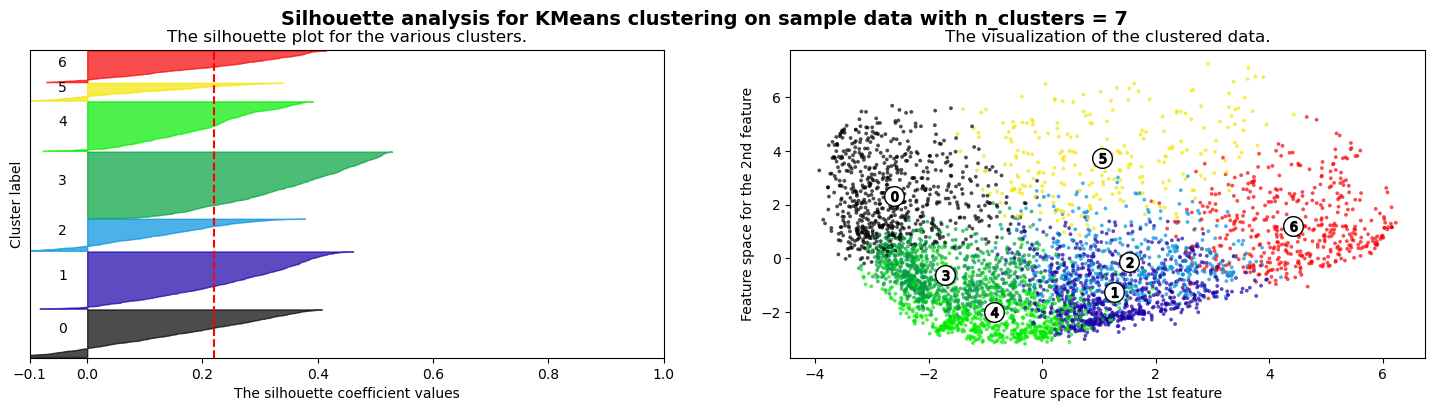

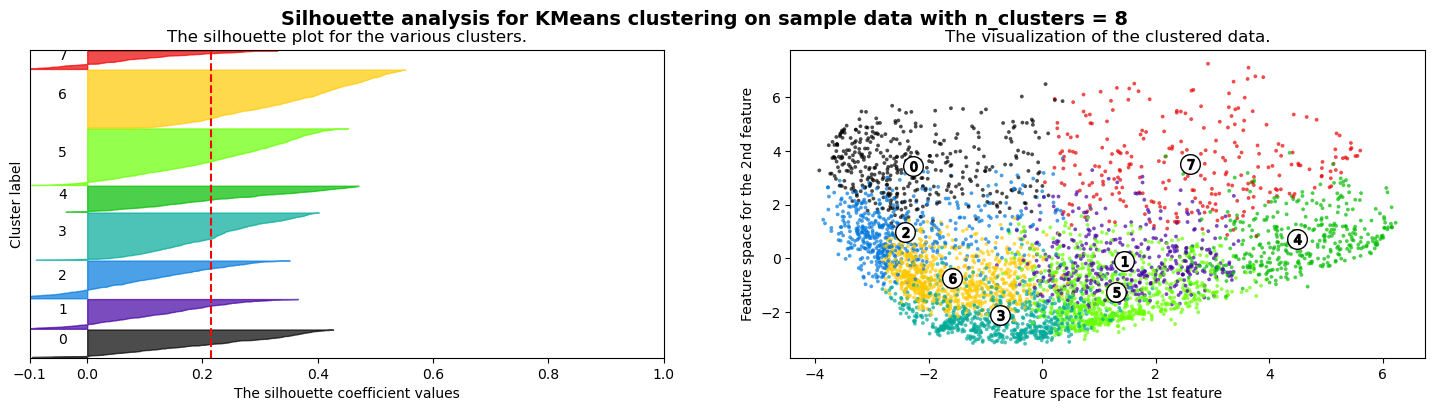

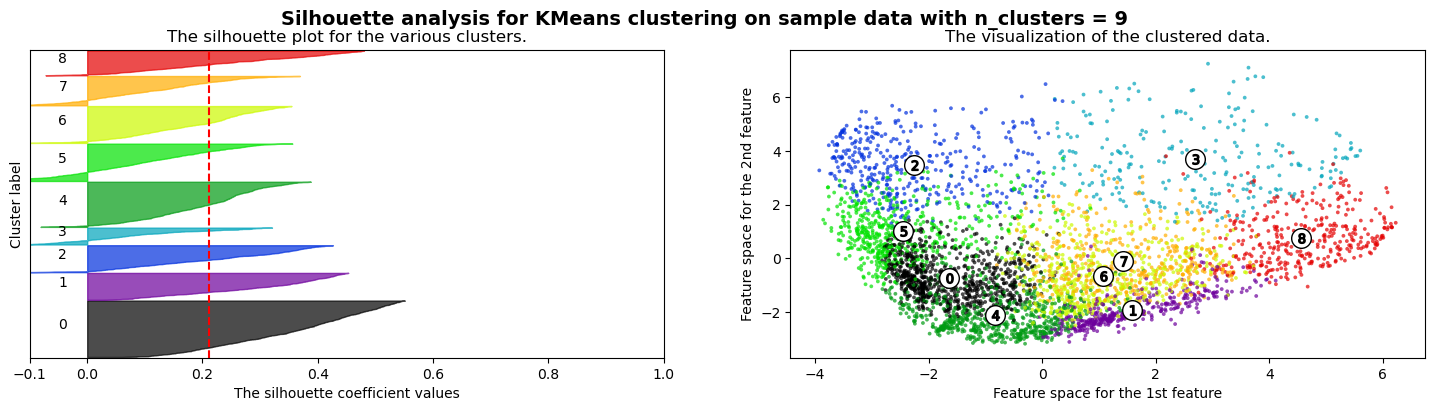

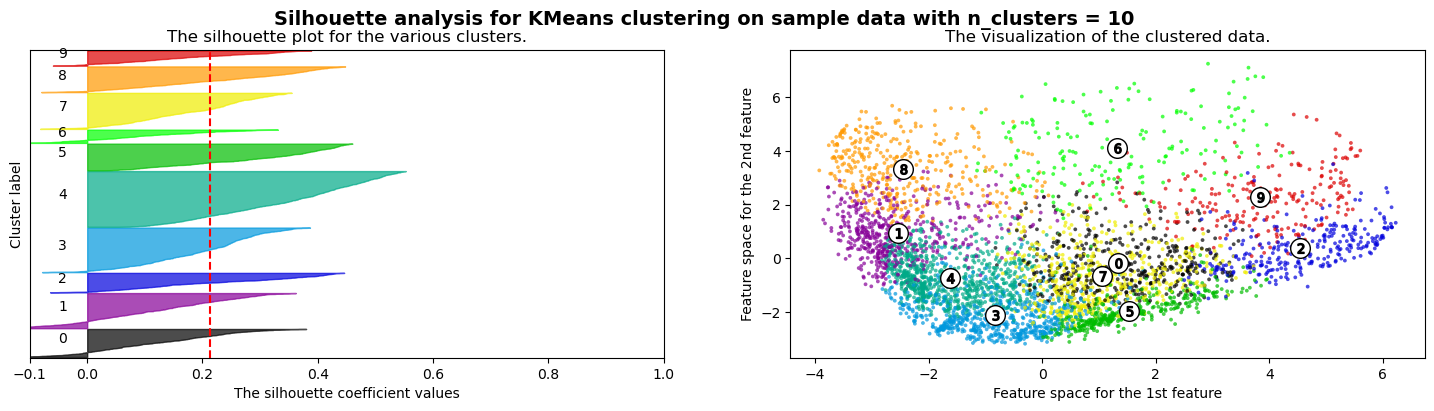

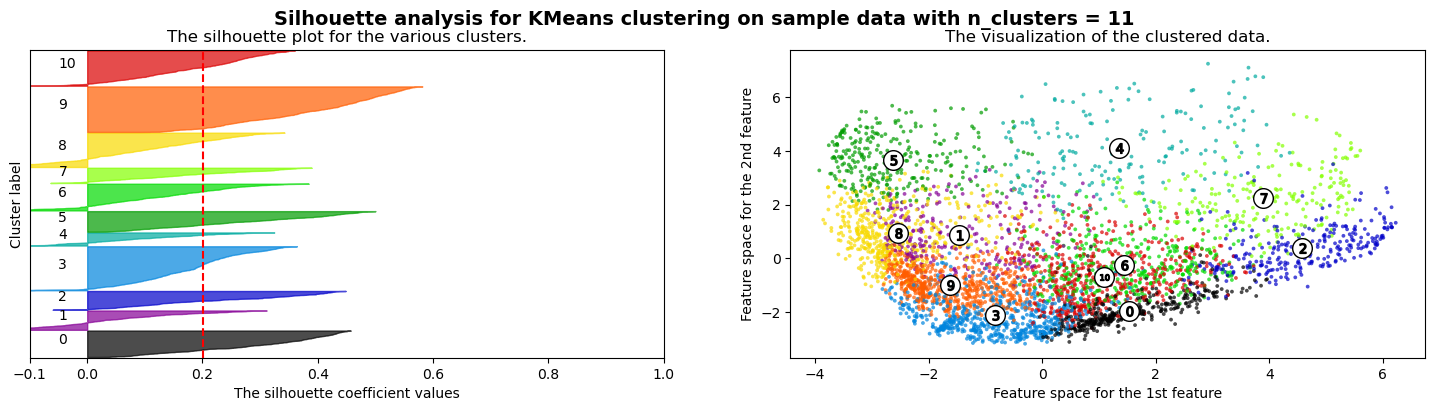

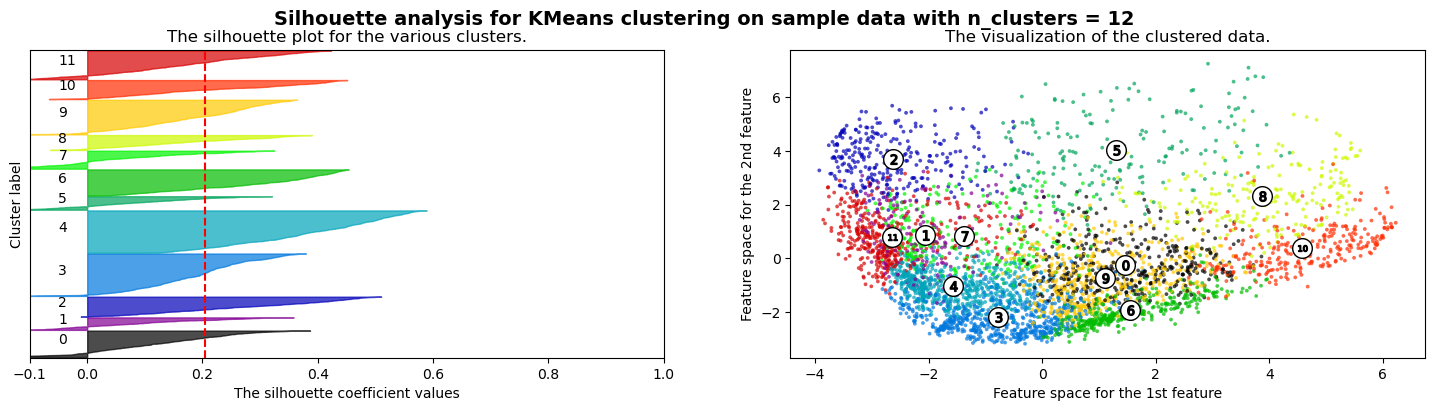

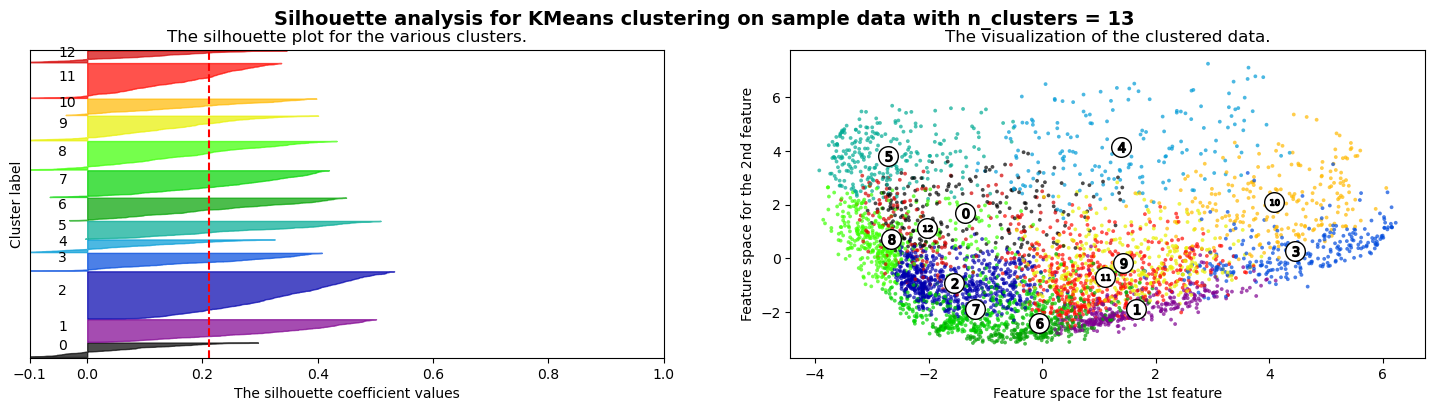

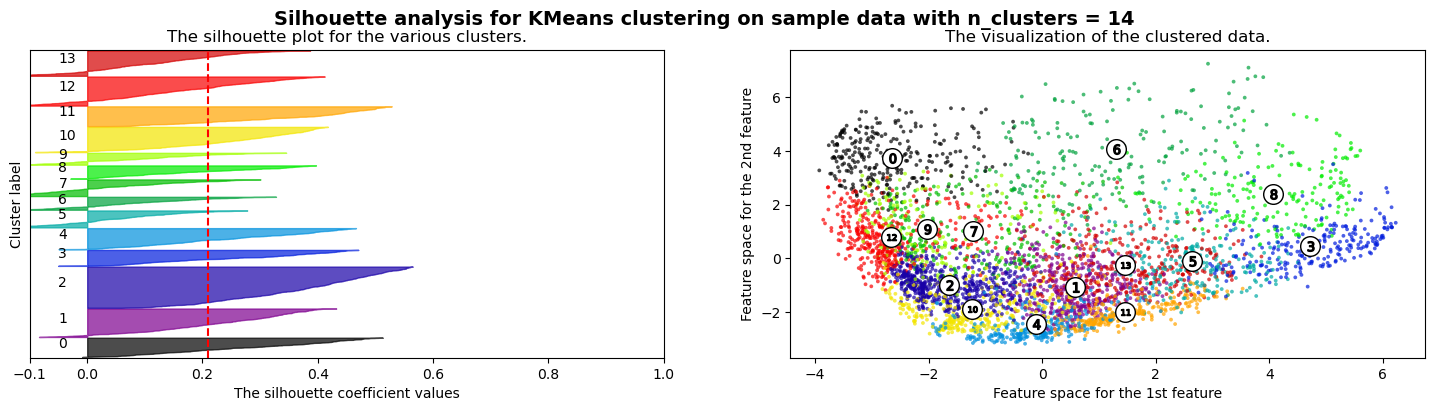

In [25]:
# Display Silhouette Score and Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), df_scaled_pca, random_state)

Untuk mencari cluster yang optimal harus dicari koefisien silhouette yang mendekati +1 karena menunjukkan bahwa sampel tersebut jauh dari cluster sekitarnya.Nilai 0 menunjukkan bahwa sampel berada pada atau sangat dekat dengan cluster yang lainnya. Nilai negatif menunjukkan bahwa sampel tersebut mungkin berada pada cluster yang salah.  

 Dari hasil visualisasi diatas kita mendapatkan bahwa n_clusters = 3 merupakan yang paling optimal untuk kita ambil, dikarenakan menunjukkan sebagian besar kelompok di atas garis rata-rata dan cluster yang terpisah dengan baik meskipun masih terdapat sedikit skor negatif. Untuk itu, kita akan membaginya menjadi 3 cluster.



## 8. Model Training

In [26]:
## Melakukan predict menggunakan KMeans
np.random.seed(42)
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
pred = km.fit_predict(df_scaled_pca)
pred

array([2, 2, 2, ..., 1, 1, 1])

In [27]:
# Memasukkan hasil clustering ke dataset
df3['cluster'] = pred
df3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  cluster  
1      215.325023        410.484825          0.000000        2  
3      258.032630        151.696433          0.000000        2  
4      397.090516        227.143184          0.000000        2  
5      343.102984        712.986387          0.000000        2  
7       57.266292         56.720210          0.000000        2  
...           ...               ...               ...      ...  
4470  1379.635287        271.364415          0.090909        1  
4471  4245.361617        241.645387          0.090909        1  
4

## 9. EDA 2

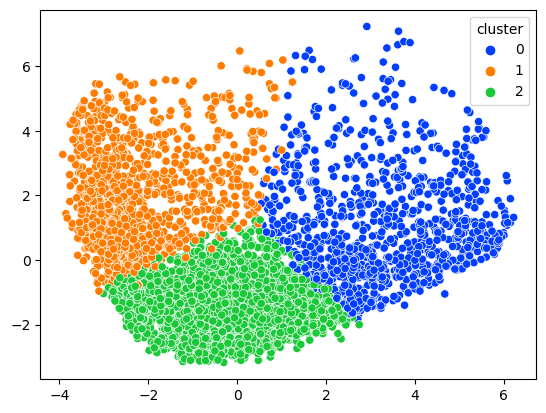

In [28]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df3_scaled)

df_scaled_pca_2d = pca_2d.fit_transform(df3_scaled)

sns.scatterplot(x=df_scaled_pca_2d[:,0], y=df_scaled_pca_2d[:,1], hue=df3['cluster'], palette='bright');

Dapat dilihat dari hasil visualisasi bahwa data sudah bisa terbagi ke cluster masing-masing.

In [29]:
# Mencari jumlah value pada cluster
df3.cluster.value_counts()

cluster
2    2184
1    1130
0    1002
Name: count, dtype: int64

Dari hasil diatas terlihat bahwa cluster 2 merupakan cluster dengan jumlah terbanyak dengan nilai 2184, setelah itu cluster 1 memiliki jumlah data sebanyak 1130 dan yang terakhir cluster 0 merupakan yang paling sedikit dengan jumlah 1002.

In [30]:
# Mencari mean masing-masing kolom berdasarkan cluster
df_kmeans = df3.groupby('cluster').mean()
df_kmeans

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
cluster                                                                  
0        1742.354376           0.980314  2122.631921       1016.905529   
1        2738.215169           0.966967   234.473597        143.559416   
2         601.500324           0.917145   409.107832        183.819080   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
0                    787.349712    365.945172             0.905699   
1                     79.368850   1890.601144             0.181455   
2                    214.430594    163.775044             0.470137   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
cluster                                                                 
0                          0.512181                          0.699593   
1                          0.077502                          0.107035   
2                          0.110562                          0.354458   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
cluster                                                            
0                      0.070677          1.320359      30.031936   
1                      0.350716          6.727434       3.400885   
2                      0.043717          0.671703       7.729396   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
cluster                                                                 
0         6645.490837  2414.026436        660.342833          0.145909  
1         5305.929204  1727.745011        961.932513          0.034066  
2         2992.611925   741.073824        331.567594          0.117055

<Axes: ylabel='cluster'>

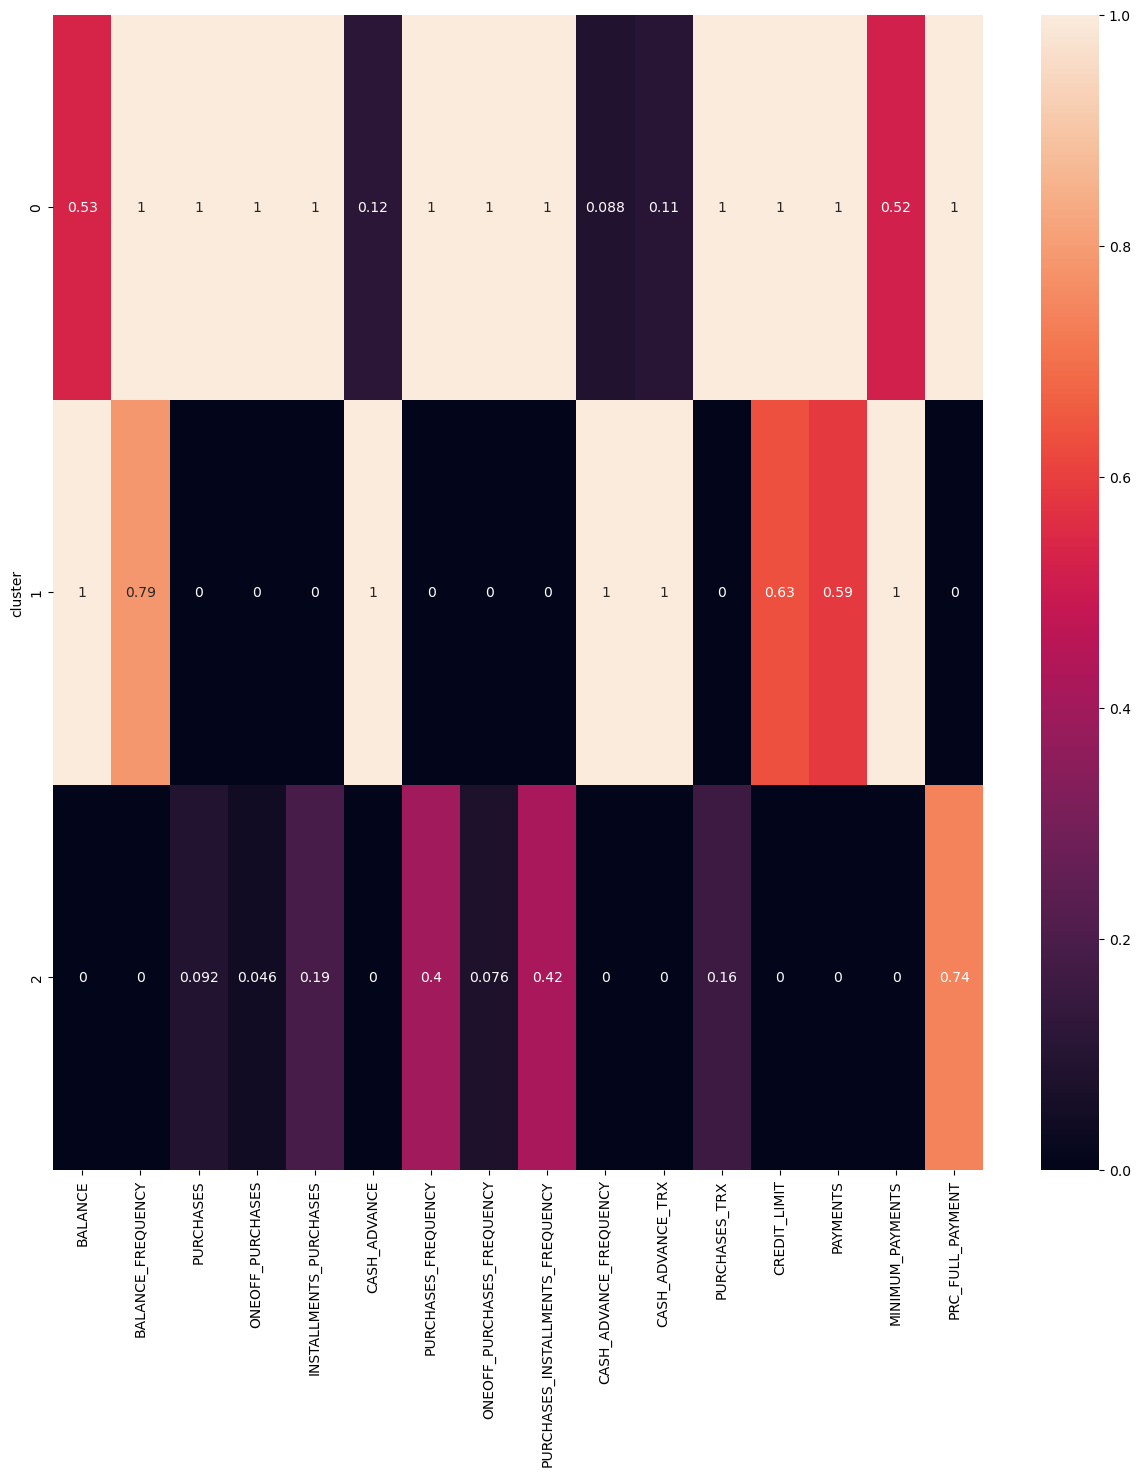

In [31]:
# Membuat heatmap
scaler = MinMaxScaler()
data = scaler.fit_transform(df_kmeans)
scaled_kmeans = pd.DataFrame(data,df_kmeans.index,df_kmeans.columns)

plt.figure(figsize=(15,15))
sns.heatmap(scaled_kmeans,annot=True)

Dari hasil mean dan juga heatmap kita bisa mengambil kesimpulan terkait dengan masing-masing cluster sebagai berikut:  

  
Cluster 0 : Cluster ini memiliki mayoritas value tinggi (warna terang) pada beberapa kolom dan juga nilai average yang tinggi pada kolom PURCHASES, ONE-OFF PURCHASES, dan INSTALLMENT PURCHASES menunjukkan bahwa nasabah tersebut paling aktif menggunakan kartunya untuk bertransaksi. Dari sini terlihat bahwa cluster ini merupakan orang-orang yang sering berbelanja menggunakan kartunya.

Cluster 1 : Cluster ini menunjukkan  nilai rendah (warna gelap) untuk sebagian kolom dan juga nilai rata-rata yang tinggi pada CASH ADVANCE dan CASH ADVANCE FREQUENCY. Yang berarti, mereka memiliki frekuensi pembelian paling rendah, baik sekali beli maupun cicilan, sehingga menunjukkan bahwa orang-orang ini lebih banyak menggunakan kartu kreditnya untuk keperluan tunai dibandingkan membeli barang.

Cluster 2 : Cluster ini menunjukkan  nilai rendah (warna gelap) untuk mayoritas kolom dan juga nilai rata-rata PURCHASES, ONE-OFF PURCHASES, INSTALLMENT PURCHASES yang moderat dibandingkan dengan klaster lainnya, menunjukkan penggunaan yang seimbang antara berbagai jenis transaksi.
​

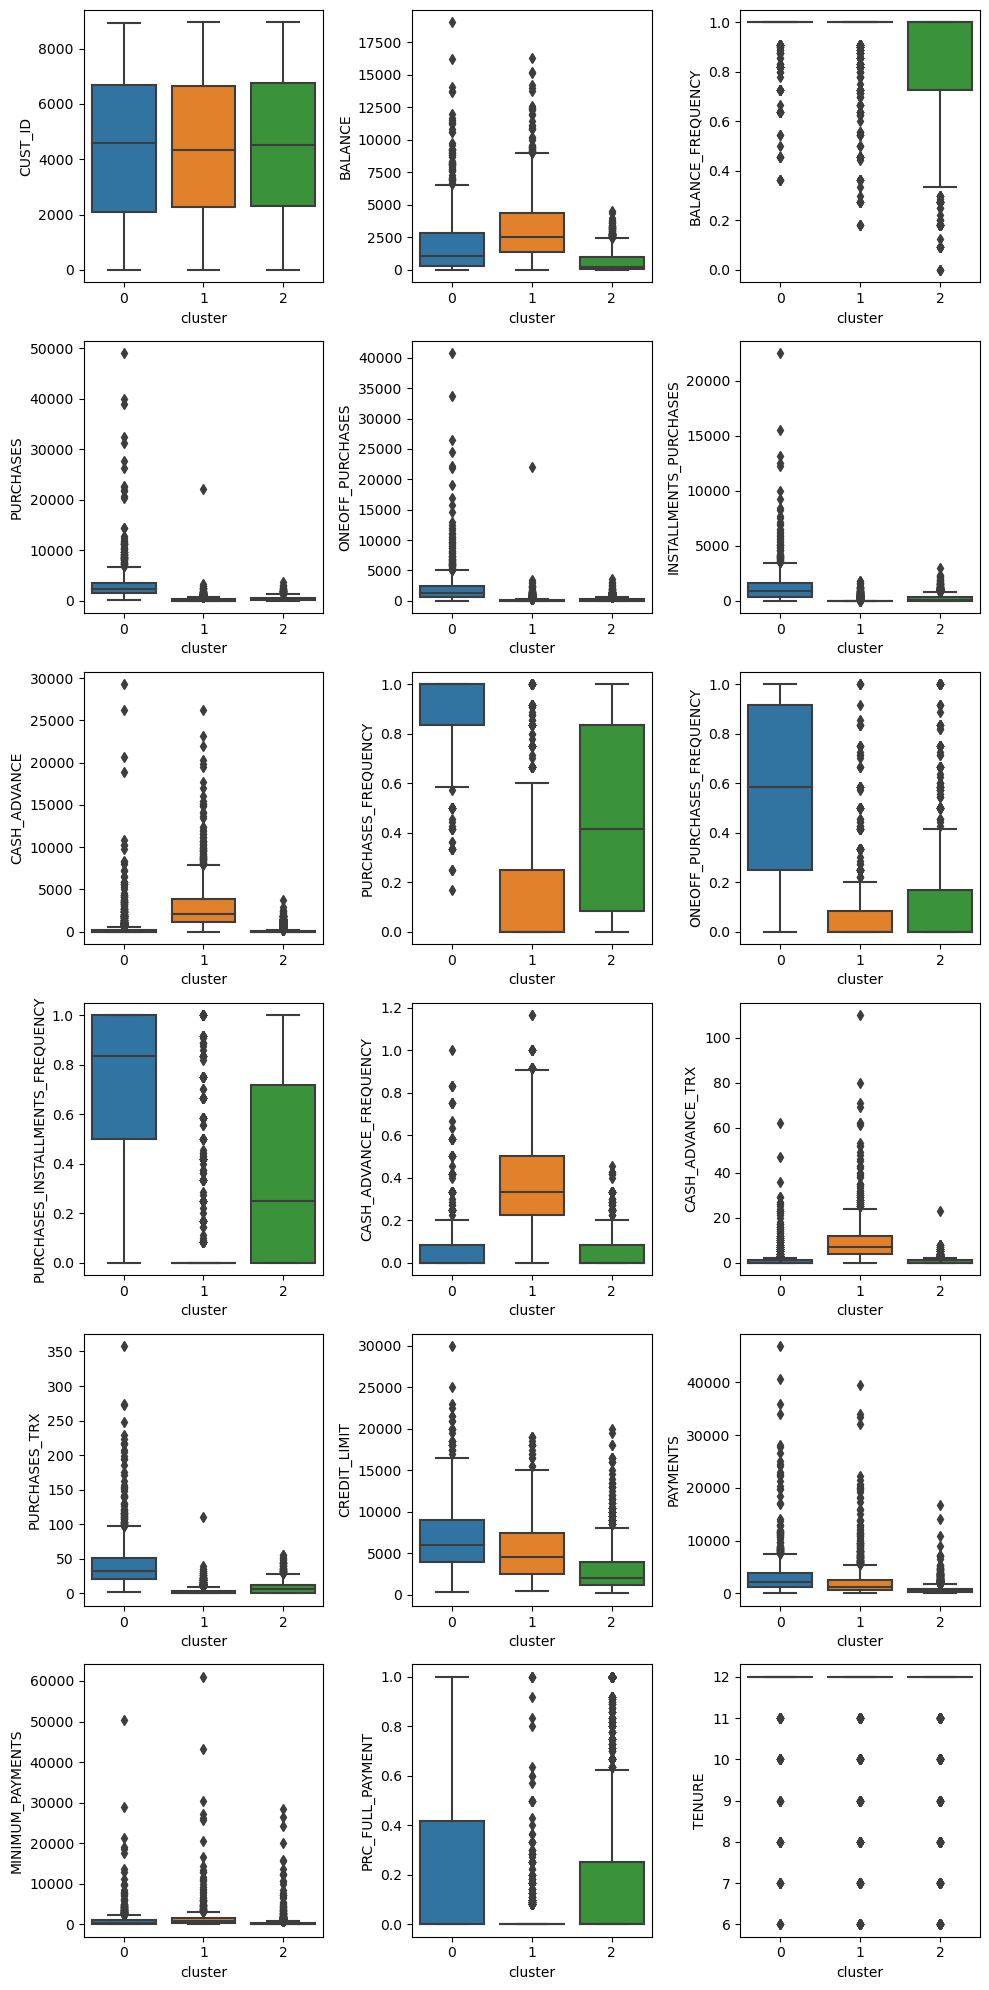

In [32]:
# Cluster Variance
fig, axes = plt.subplots(6, 3, figsize=(10,20))
axes = axes.flatten()

for ax, col in zip(axes, df):
    plot = sns.boxplot(x=df3["cluster"], y=df[col], ax=ax)
    plt.tight_layout()

Dari boxplot diatas terlihat bahwa segmentasi masing-masing fitur dari tiap cluster terlihat berbeda, ini menandakan segmentasi yang dilakukan telah cukup baik. 

## 9. Model Saving

In [33]:
# Save Model
with open("model.pkl", "wb") as f1:
    pickle.dump(km, f1)

# Save scaler
with open("scaler.pkl", "wb") as f2:
    pickle.dump(scaler, f2)
    
# Save Encoder
with open("pca.pkl", "wb") as f3:
    pickle.dump(pca, f3)

## 10. Model Inference

Terdapat pada panji_putra_inference.ipynb

## 11. Pengambilan Kesimpulan

Dari hasil analisa data credit card yang memiliki 18 kolom dengan 4.475 rows kita dapat membuat model untuk melakukan clustering pengguna credit card berdasarkan 3 cluster yaitu:
- Cluster 0: Pengguna yang berbelanja tinggi dan sering menggunakan kartunya untuk berbelanja.
- Cluster 1: Pengguna yang berfokus pada uang tunai yang mengandalkan kartu mereka untuk penarikan tunai dibandingkan pembelian.
- Cluster 2: Pengguna yang lebih moderat yang memiliki saldo dan batas kredit lebih rendah, dan menggunakan kartu mereka untuk berbagai pembelian dan kebutuhan tunai, namun lebih jarang dibandingkan dua cluster lainnya.

Saran dari kesimpulan yang dibuat:  
Implementasikan program rewards yang menawarkan poin dan cashback untuk tiap pengguna agar lebih banyak menggunakan credit card dalam melakukan pembelanjaan. 
Mempertimbangkan penyesuaian limit credit berdasarkan pola pengeluaran yang berbeda di setiap kluster untuk meningkatkan efisiensi penggunaan credit card.

## Conceptual Problems

### 1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?

Pada algoritma K-Means, inertia mengacu pada total jarak kuadrat antara semua titik data dengan centroid klasternya. Inersia merupakan matrix yang digunakan untuk menilai kualitas pengelompokan yang dihasilkan oleh algoritma K-Means. Semakin rendah nilai inersia, maka semakin baik pengelompokannya.

### 2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

Elbow Method adalah metode yang digunakan untuk menentukan jumlah cluster yang optimal dalam algoritma K-Means. Metode ini didasarkan pada inertia (total jarak kuadrat antara semua titik data dengan centroid klasternya).  

Cara Penggunaan:

1. Jalankan algoritma K-Means dengan berbagai nilai K (misalnya, K = 2, 3, 4, ..., 10).
2. Hitung nilai inertia untuk setiap nilai K.
3. Buat plot dengan nilai K pada sumbu x dan nilai inertia pada sumbu y.
4. Cari titik pada plot di mana kurva mulai "menekuk" (seperti siku). Nilai K di titik tersebut adalah nilai K yang optimal.

Kelebihan:

- Mudah dipahami dan diimplementasikan.
- Memberikan cara yang objektif untuk memilih jumlah cluster.

Kelemahan:

- Tidak selalu akurat, terutama pada data yang tidak memiliki distribusi normal.
- Bisa dipengaruhi oleh outlier.